### importing dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #ensemble model coz RF contains decisiontrees
from sklearn.metrics import accuracy_score

### Data Collection

In [4]:
#load dataset
wine_ds = pd.read_csv('WineQT.csv')

In [6]:
wine_ds.shape

(1143, 13)

In [10]:
wine_ds = wine_ds.drop('Id',axis=1)
wine_ds.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#check for null values
wine_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Data analysis and visualization

In [9]:
#statistical measures of ds
wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


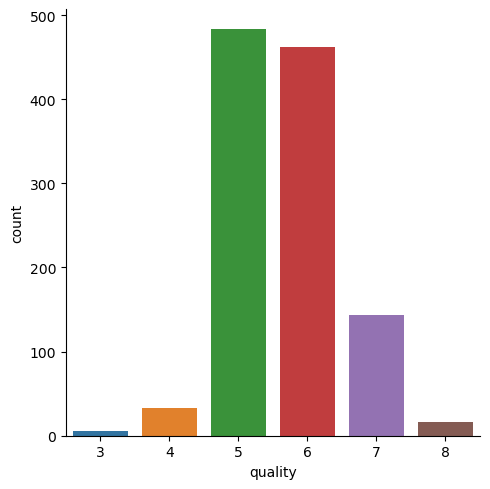

In [11]:
#count for each quality
sns.catplot(x='quality',data = wine_ds, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

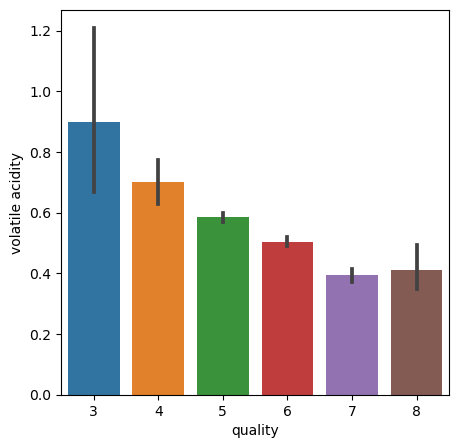

In [12]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data = wine_ds)

<Axes: xlabel='quality', ylabel='citric acid'>

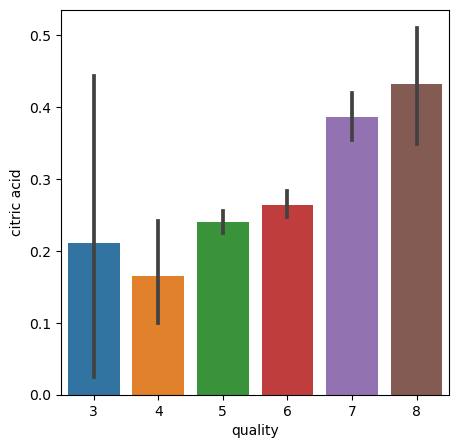

In [13]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data = wine_ds)

In [14]:
'''from the graphs we can say that high volatile acidity give low quality 
   and high citric acid give high quality'''

'from the graphs we can say that high volatile acidity give low quality \n   and high citric acid give high quality'

### Correlation

In [15]:
correlation = wine_ds.corr()

<Axes: >

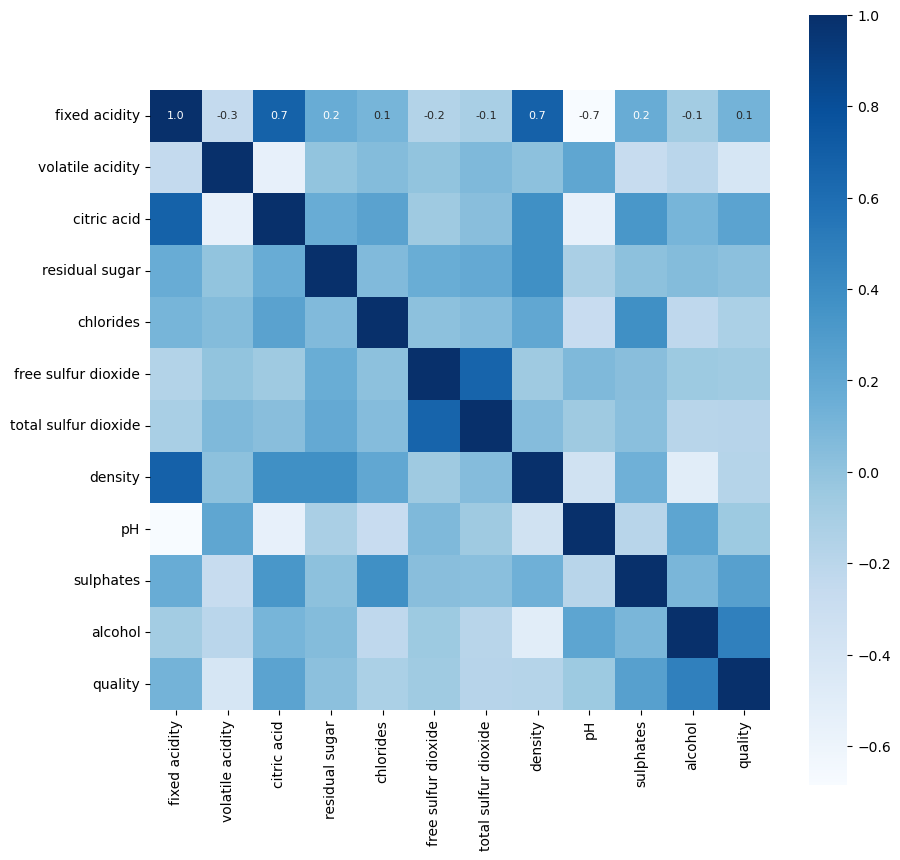

In [20]:
#heat map to understand correlation b/w cols
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square = True, fmt='.1f',annot=True,annot_kws={'size':8},cmap = 'Blues')

###  Data Perprocessing

In [22]:
#seperate data and label
x = wine_ds.drop('quality',axis = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Label binirization

In [23]:
#we are binirizing the labels 
#i.e taking 0 and 1 as labels
#0 for quality <=6 and 1 for quality >=7
y = wine_ds['quality'].apply(lambda y_val : 1 if y_val>=7 else 0)

In [31]:
#y contains labels and x contains data
y.shape

(1143,)

### Train adn test data

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [29]:
y_train.shape

(914,)

### Model training

In [30]:
#using randomforest
#it is an ensemble model of decision tree
model = RandomForestClassifier()

In [32]:
model.fit(x_train,y_train)

RandomForestClassifier()

### Model Evaluation

In [33]:
# accuracy on test data
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred,y_test)

In [34]:
print('Accuracy :',test_data_accuracy)

Accuracy : 0.9170305676855895


### Building a predictive System

In [39]:
input_data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)

#input to numpy array
input_data_arr = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_resp = input_data_arr.reshape(1,-1)

pred = model.predict(input_data_resp)
if pred[0]==1:
    print('Good Quality wine')
else:
    print('Bad Quality wine')

Good Quality wine


C:\Users\sarva\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
